**Importing data set and nessecory libraries**

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import warnings

In [34]:
try:
  df=pd.read_csv('/content/Bitcoin Pulse  Hourly Dataset from Markets Trends and Fear.csv')
  print("Data set loaded correctly")
except:
  print("Error loading data set")
warnings.filterwarnings("ignore")


Data set loaded correctly


**Data cleaning and preprocessing**

In [14]:
df.head()

,timestamp,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,...,Open_sp500,Volume_sp500,btc_dominance,altcoin_market_cap,fear_greed_index,trend_bitcoin,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest
0,2023-04-09 00:00:00,310.5739,311.1801,310.4821,311.1801,28.717,27943.39,28073.95,27930.31,28035.04,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
1,2023-04-09 01:00:00,311.1801,311.6257,311.1489,311.6132,15.980,28035.04,28080.00,28029.69,28075.72,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
2,2023-04-09 02:00:00,311.6132,311.8623,311.2814,311.2814,37.265,28075.72,28080.84,28027.47,28033.86,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
3,2023-04-09 03:00:00,311.2814,311.4965,311.0072,311.2450,22.836,28033.86,28047.09,28019.16,28025.87,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
4,2023-04-09 04:00:00,311.2450,311.3736,311.0723,311.1659,44.535,28025.87,28038.02,28016.28,28036.28,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09


In [15]:
df.isnull().sum()

,0
timestamp,0
BNB_USDT_1h_open,0
BNB_USDT_1h_high,0
BNB_USDT_1h_low,0
BNB_USDT_1h_close,0
...,...
trend_bitcoin,0
trend_buy_crypto,0
google_trends_bitcoin,0
google_trends_buy_crypto,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17516 entries, 0 to 17515
Data columns (total 99 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 17516 non-null  object 
 1   BNB_USDT_1h_open          17516 non-null  float64
 2   BNB_USDT_1h_high          17516 non-null  float64
 3   BNB_USDT_1h_low           17516 non-null  float64
 4   BNB_USDT_1h_close         17516 non-null  float64
 5   BNB_USDT_1h_volume        17516 non-null  float64
 6   BTC_USDT_1h_open          17516 non-null  float64
 7   BTC_USDT_1h_high          17516 non-null  float64
 8   BTC_USDT_1h_low           17516 non-null  float64
 9   BTC_USDT_1h_close         17516 non-null  float64
 10  BTC_USDT_1h_volume        17516 non-null  float64
 11  DOGE_USDT_1h_open         17516 non-null  float64
 12  DOGE_USDT_1h_high         17516 non-null  float64
 13  DOGE_USDT_1h_low          17516 non-null  float64
 14  DOGE_U

In [17]:
df.describe()

,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,BTC_USDT_1h_volume,...,Open_sp500,Volume_sp500,btc_dominance,altcoin_market_cap,fear_greed_index,trend_bitcoin,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest
count,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,...,17516.000000,1.751600e+04,17516.000000,1.751600e+04,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,1.751600e+04
mean,449.579902,451.401201,447.613880,449.593638,1071.446362,56629.480715,56834.612843,56418.535820,56632.388149,606.837407,...,5103.633538,3.437815e+08,17.566967,1.027649e+12,58.765928,39.481388,25.748116,39.481388,25.748116,1.618888e+10
std,174.385817,175.265286,173.421428,174.384341,1562.150120,24184.088339,24293.718718,24072.415895,24183.700669,632.310603,...,634.970122,1.070437e+08,2.608727,3.379820e+11,16.268719,14.929269,15.799754,14.929269,15.799754,7.953643e+09
min,203.532800,204.606700,202.026800,203.532800,7.359880,24924.360000,24974.050000,24394.740000,24924.360000,7.718360,...,4050.679932,0.000000e+00,-2.890000,5.564477e+11,10.000000,23.000000,12.000000,23.000000,12.000000,6.981415e+09
25%,250.017400,251.210450,248.955800,250.017400,238.076145,30405.330000,30471.902500,30334.442500,30407.497500,192.564846,...,4482.609863,3.044420e+08,16.710000,6.765228e+11,48.000000,29.000000,17.000000,29.000000,17.000000,9.615329e+09
50%,523.525000,526.005000,521.190000,523.605000,595.928830,59415.210000,59643.950000,59193.790000,59420.930000,425.702958,...,5136.910156,3.474520e+08,17.710000,1.029207e+12,61.000000,34.000000,20.000000,34.000000,20.000000,1.489108e+10
75%,596.591850,598.382250,594.522500,596.591850,1310.539555,69356.970000,69519.157500,69147.797500,69358.085000,838.211382,...,5647.209961,3.927860e+08,19.070000,1.237942e+12,72.000000,48.000000,26.000000,48.000000,26.000000,1.905631e+10
max,783.950000,794.000000,775.850000,783.950000,44240.975550,108322.460000,109900.000000,107794.040000,108322.460000,15206.868300,...,6143.520020,1.005516e+09,28.890000,1.896919e+12,94.000000,100.000000,100.000000,100.000000,100.000000,3.675204e+10


In [18]:
df['fear_greed_index'].is_unique

False

In [19]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# EDA

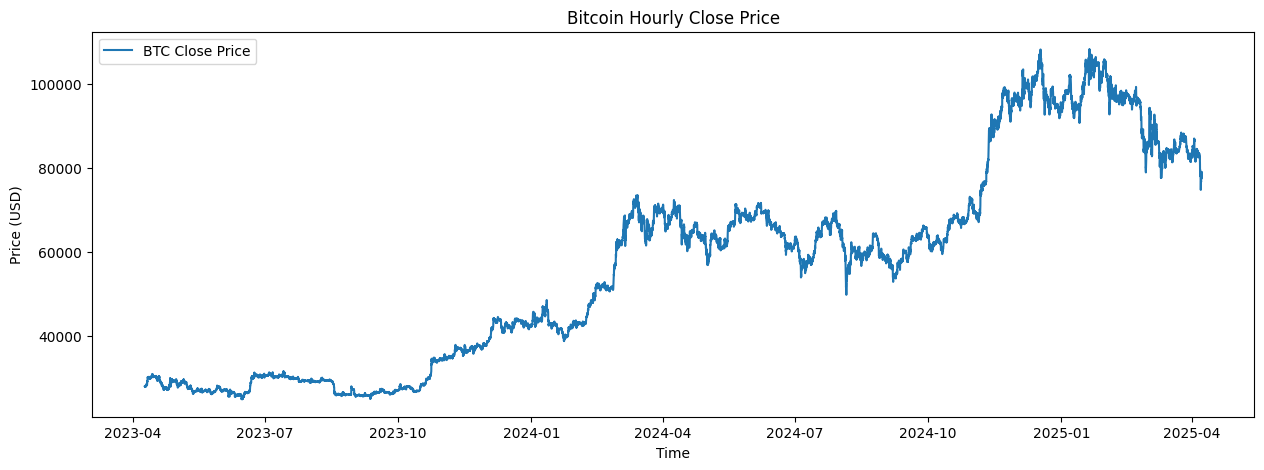

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df['BTC_USDT_1h_close'], label='BTC Close Price')
plt.title("Bitcoin Hourly Close Price")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

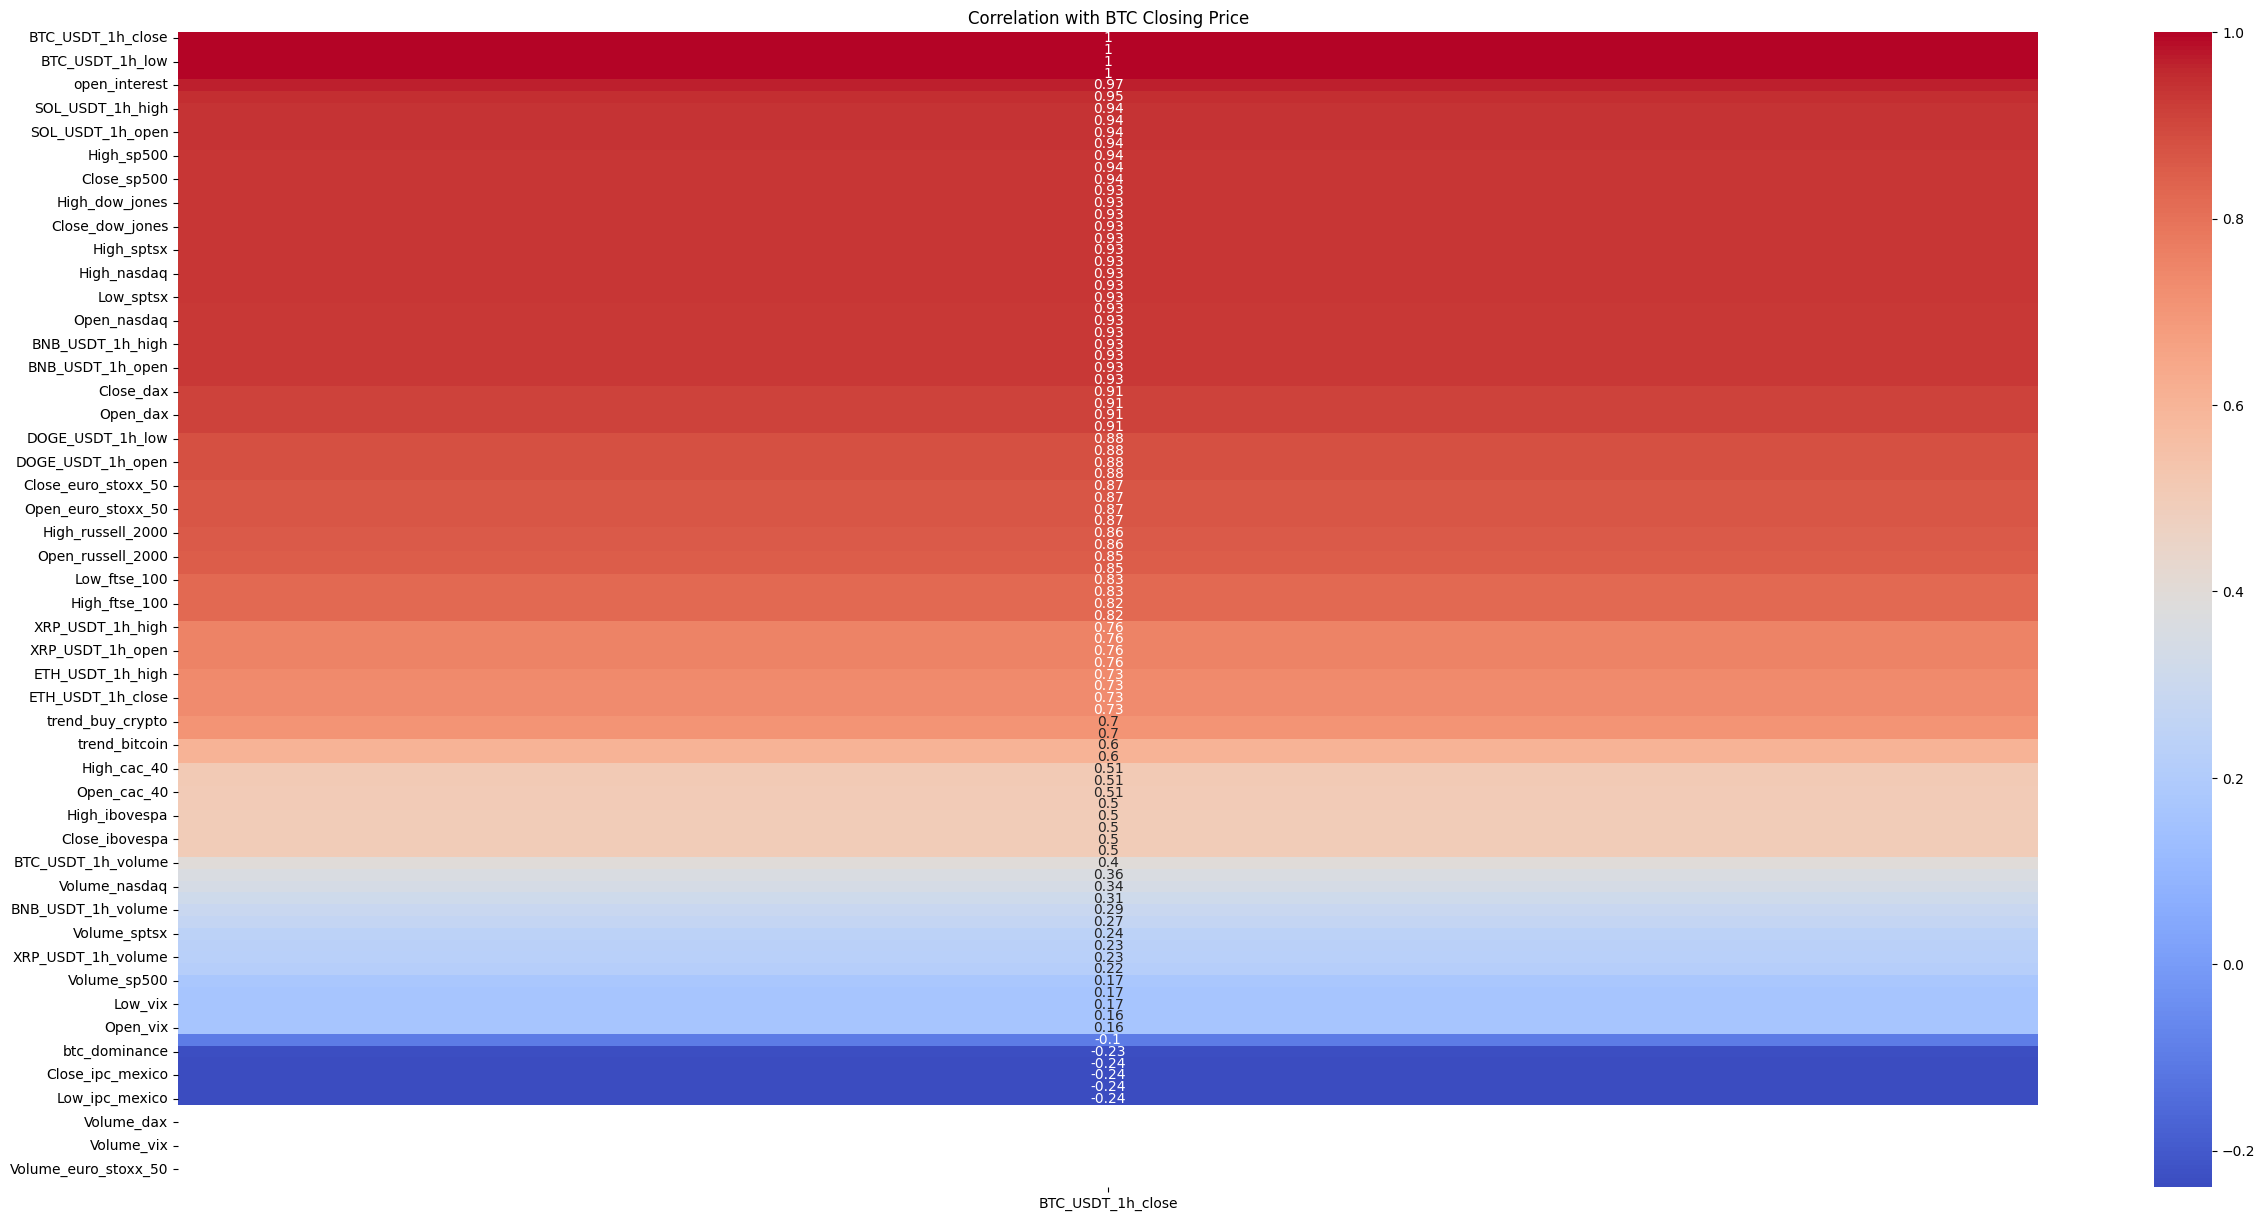

In [21]:
plt.figure(figsize=(30,15))
corr = df.corr()
sns.heatmap(corr[['BTC_USDT_1h_close']].sort_values(by='BTC_USDT_1h_close', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with BTC Closing Price")
plt.show()

In [22]:
df_pct = df[['BTC_USDT_1h_close', 'BNB_USDT_1h_close', 'Open_sp500', 'fear_greed_index', 'btc_dominance']].pct_change()
df_pct.rename(columns=lambda x: f"{x}_pct_change", inplace=True)
df = pd.concat([df, df_pct], axis=1)
df.dropna(inplace=True)

**Feature Selection**

In [23]:
X = df.drop(columns=['BTC_USDT_1h_close'])
y = df['BTC_USDT_1h_close']

# Model Seclection

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

**Linear Regression**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9999801708098015
Mean Squared Error: 11490.68445796558
Mean Absolute Error: 61.407465946792016


**Random Forest Regressor**

In [27]:
rf = RandomForestRegressor(max_depth=3,n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9892524325328865
Mean Squared Error: 6228035.8007038245
Mean Absolute Error: 1912.0905879299617


**Ridge Regression**

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9999857321929796
Mean Squared Error: 8267.95581349173
Mean Absolute Error: 51.09918937061915


**Lasso Regression**

In [40]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9999762977681993
Mean Squared Error: 13735.047364268594
Mean Absolute Error: 67.62723367142185


**Best Model**

In [38]:
best_model = Ridge(alpha=1.0)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

# Next 30 Days Bitcoin price prediction

**LSTM (Long Short Term Memory)**

In [46]:
df.fillna(method='ffill', inplace=True)
btc_prices = df[['BTC_USDT_1h_close']].copy()
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(btc_prices)

In [47]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

SEQ_LENGTH = 72
X, y = create_sequences(scaled_prices, SEQ_LENGTH)

In [48]:
split_idx = int(X.shape[0] * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [51]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 2/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 5.0867e-04 - val_loss: 5.6710e-04
Epoch 3/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 4.1070e-04 - val_loss: 4.2000e-04
Epoch 4/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.3665e-04 - val_loss: 0.0033
Epoch 5/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 2.9372e-04 - val_loss: 4.7541e-04
Epoch 6/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2.8266e-04 - val_loss: 9.8825e-04
Epoch 7/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.4582e-04 - val_loss: 1.4263e-04
Epoch 8/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 2.3561e-04 - val_loss: 5.7908e-04
Epoch 9/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.0131e-04 - val_loss: 6.8629e-04
Epoch 10/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2.0737e-04 - val_loss: 4.0214e-04


In [53]:
future_steps = 720
last_sequence = scaled_prices[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, 1)
future_predictions = []

for _ in range(future_steps):
    next_pred = model.predict(last_sequence, verbose=0)[0][0]  # 👈 Added verbose=0
    future_predictions.append(next_pred)
    new_seq = np.append(last_sequence[:, 1:, :], [[[next_pred]]], axis=1)
    last_sequence = new_seq

In [54]:
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [55]:
future_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=future_steps, freq='H')

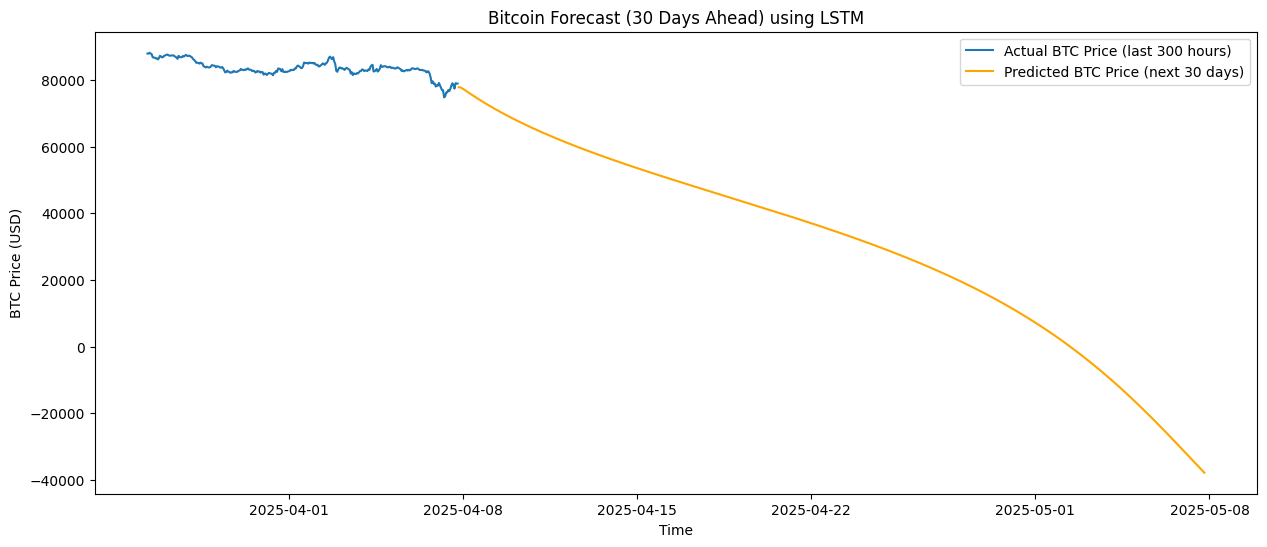

In [56]:
plt.figure(figsize=(15, 6))
plt.plot(df.index[-300:], btc_prices[-300:], label="Actual BTC Price (last 300 hours)")
plt.plot(future_index, future_prices, label="Predicted BTC Price (next 30 days)", color='orange')
plt.title("Bitcoin Forecast (30 Days Ahead) using LSTM")
plt.xlabel("Time")
plt.ylabel("BTC Price (USD)")
plt.legend()
plt.show()